In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

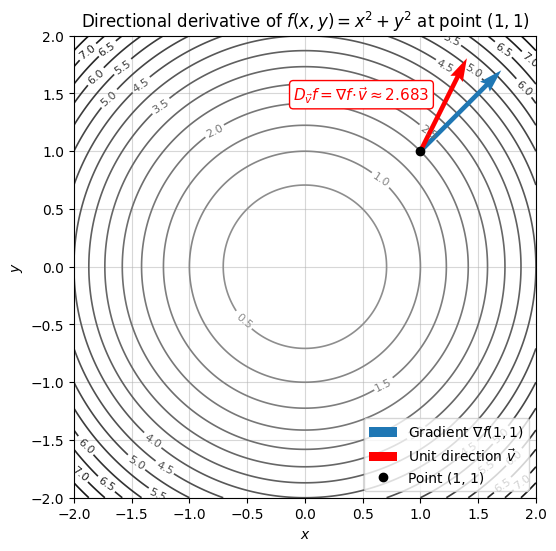

In [10]:
# ---- Function and helpers ----
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Point and direction (single example)
x0, y0 = 1.0, 1.0
v = np.array([1.0, 2.0])
v = v / np.linalg.norm(v)  # unit vector

g = grad_f(x0, y0)
D = float(g @ v)  # directional derivative value

# ---- Grid ----
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# ---- Truncated grayscale colormap (avoid near-white) ----
base = plt.get_cmap('Greys')
colors = base(np.linspace(0.5, 0.95, 256))  # darker start to avoid white
trunc_greys = LinearSegmentedColormap.from_list('trunc_greys', colors)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(8, 6))

cs = ax.contour(X, Y, Z, levels=16, cmap=trunc_greys, linewidths=1.2)
ax.clabel(cs, inline=True, fontsize=8, fmt='%0.1f')

# Vectors
grad_scale = 0.35
v_scale = 0.9

# Gradient (blue)
ax.quiver(x0, y0, g[0]*grad_scale, g[1]*grad_scale, angles='xy', scale_units='xy',
          scale=1, color='tab:blue', width=0.01, label=r'Gradient $\nabla f(1,1)$', zorder=3)

# Direction arrow 
ax.quiver(x0, y0, v[0]*v_scale, v[1]*v_scale, angles='xy', scale_units='xy',
          scale=1, color='red', width=0.01, label=r'Unit direction $\vec{v}$', zorder=3)

# Label for directional derivative
label_pos = np.array([x0 - 1.1, y0 + 0.4]) 
ax.text(label_pos[0], label_pos[1],
        rf'$D_{{\vec v}} f = \nabla f \!\cdot\! \vec v \approx {D:.3f}$',
        fontsize=11, color='red',
        ha='left', va='bottom',
        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.25'), zorder=5)

# Mark point
ax.plot(x0, y0, 'o', color='black', label='Point (1, 1)', zorder=4)

# Aesthetics
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Directional derivative of $f(x,y)=x^2+y^2$ at point $(1,1)$')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.5)

plt.savefig('figures/directional_derivative.pdf')